# Домашнее задание 3.1


# 🏃‍♂️🤸‍♂️🏋️‍♀️ 
Ты все еще в команде популярной сети фитнес-клубов. Мы ищем точки роста на следующий год и хотим исследовать две темы: 

1. **Тренировки**: как они распределяются во времени и по тренерам, как обстоят дела в разных клубах.
2. **Клиентов**: как их можно сегментировать, какие у них привычки.

В следующих 6 заданиях ты построишь графики — они помогут сформулировать новые гипотезы для роста нашей сети фитнес-клубов в следующем году.

В заданиях ставляй свои комментарии о том, какие закономерности видишь на графиках. 

Для начала подключись ко всем нужным библиотекам и данным. Проверь, что данные лежат в той же папке, что этот ноутбук.

In [1]:
import pandas as pd
from matplotlib import pyplot as plt
import seaborn as sns

In [2]:
# загружаем данные

workouts = pd.read_csv('workouts.csv', parse_dates=['start_at'])
users = pd.read_excel('users.xlsx')

# сразу создадим новый датафрейм, в котором соединены уроки и пользователи

workouts_users =  pd.merge(workouts, users, 
                     how='left',
                     left_on='client_id', right_on='user_id')

## Задание 1

**Построй линейный график, который показывает количество тренировок за каждый день. 
Оставь комментарий — какие закономерности ты наблюдаешь?**

Как это сделать?

1. Работать будем с датафреймом `workouts`.
2. Сгруппируй данные по каждому дню в году (именно дню, а не числу, например 1 января и 1 февраля – это разные дни). Для этого идеально подойдет метод `resemple()`, если не помнишь, как он работает, смело смотри в шпаргалке. После найди количество проведенных тренировок в каждый день и запиши их в переменную `trainings_by_day`.
3. Построй линейный график. Можешь добавить любые агрументы, но обязательно используй вот эти: 
    - размер графика
    - название графика 
    - подпись оси `X` 
    
    - подпись оси `Y` 
4. Удали неполные данные, которые мешают анализу.

In [3]:
trainings_by_day = workouts.resample('D', on='start_at')['workout_id'].count().iloc[:-1]
trainings_by_day

start_at
2020-01-01      1
2020-01-02      4
2020-01-03      5
2020-01-04      5
2020-01-05      9
             ... 
2020-12-03    486
2020-12-04    365
2020-12-05    292
2020-12-06    250
2020-12-07    451
Freq: D, Name: workout_id, Length: 342, dtype: int64

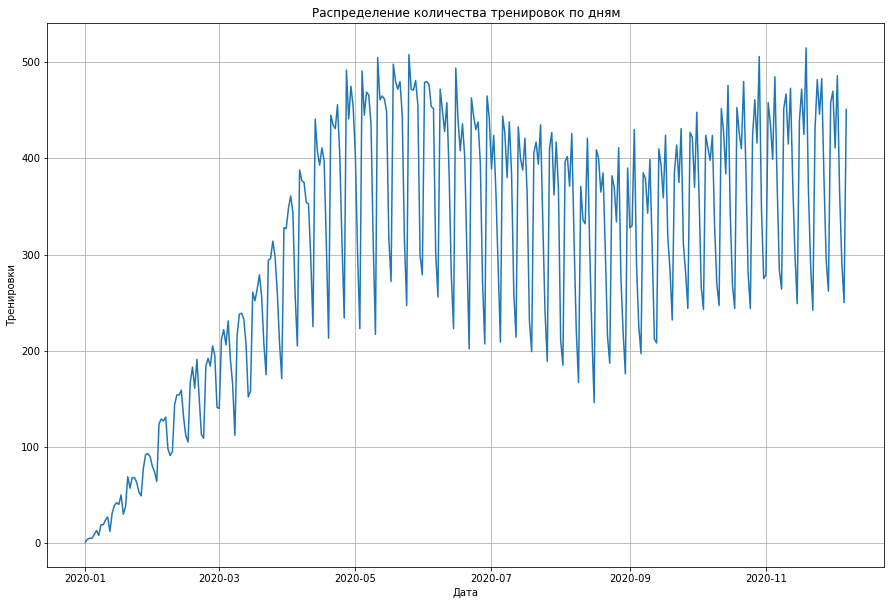

In [4]:
plt.figure(figsize=(15,10))
plt.title('Распределение количества тренировок по дням')
plt.xlabel('Дата')
plt.ylabel('Тренировки')
plt.grid()
plt.plot(trainings_by_day)
plt.show()

## Задание 2

В ноябре постоянные тренеры жаловались на перегрузку. При этом в одних департаментах часто не хватало тренеров, а в других люди сидели без работы. Поэтому по каждому департаменту нам важно узнать, какую нагрузку имеют тренера (в количестве тренировок) и сколько тренеров имеют ту или иную нагрузку. 

**Построй гистограмму распределения, которая покажет, сколько тренеров провели n число тренировок в ноябре. При подсчете постоянных тренеров рассматриваем только тех, которые уже работали в нашей компании до 1 ноября. Сделай отдельный график по каждому департаменту (всего их 7).**

Как это сделать:

1. Внимательно изучи код, который мы подготовили, и запусти ячейки. Что мы сделали:
    - отобрали тренеров, которые уже проводили тренировки до начала ноября
    - взяли тренировки, которые прошли в ноябре
    - выбрали из них те, которые провели ранее отобранные тренеры
    

2. В цикле для каждого департамента: 

    - отфильтруй по `trainer_department` тренировки нужного департамента
    - построй гистограмму распределения количества тренеров по количеству проведенных тренировок. Можешь добавить любые аргументы, но обязательно используй вот эти:
        - размер графика
        - название графика
        - подпись оси `X`
        
        - подпись оси `Y`
        - задай цвет на графике
        - задай 5 столбцов
      


In [5]:
# выбрали тренеров, которые вели тренировки до 1 ноября
trainers_select = workouts['trainer_id'].loc[workouts['start_at'] < '2020-11-01'] 

# множеством взяли уникальные значения
trainers_select = set(trainers_select) 


In [6]:
# взяли тренировки только за ноябрь
november_workouts = workouts.loc[workouts['start_at'].dt.month == 11] 

# берем только активных тренеров
november_workouts = november_workouts.loc[november_workouts['trainer_id'].isin(trainers_select)] 

In [7]:
# кол-во тренировок у каждого тренера
workouts_by_trainer = november_workouts.groupby(['trainer_id','trainer_department'])['workout_id'].count() 

# превращаем series в dataframe, сбрасываем индекс
workouts_by_trainer = workouts_by_trainer.reset_index() 

# переименовываем столбец workout_id, ведь в нем теперь количество тренировок
workouts_by_trainer.columns = ['trainer_id','trainer_department','workouts'] 

workouts_by_trainer.head()

,trainer_id,trainer_department,workouts
0,1994,Spartacus,26
1,4446,Spartacus,9
2,9256,Spartacus,9
3,14431,Spartacus,11
4,15062,Spartacus,8


In [8]:
# посмотрим, какие у нас есть департаменты
departments = set(workouts_by_trainer['trainer_department'])
departments

{'Athletic',
 'Consultant',
 'Cycling',
 'Dinamo',
 'Sales',
 'Spartacus',
 'Sports Reserves'}

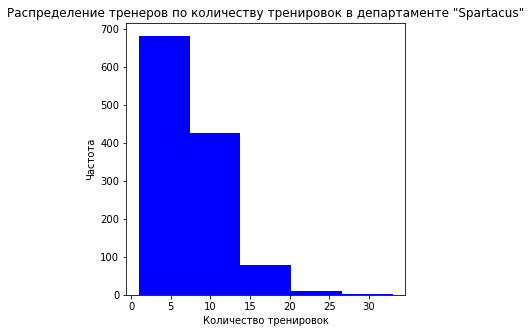

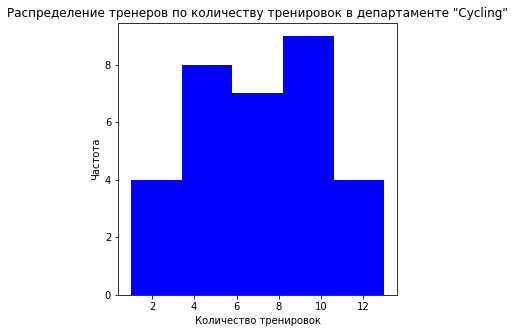

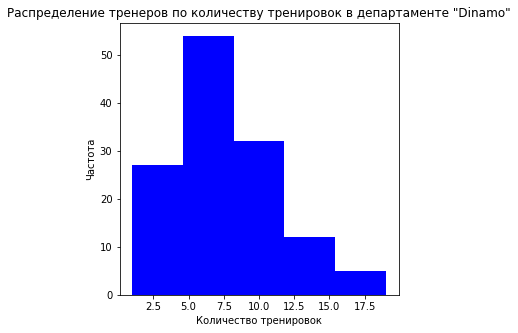

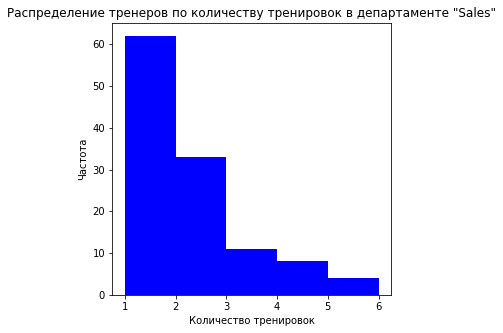

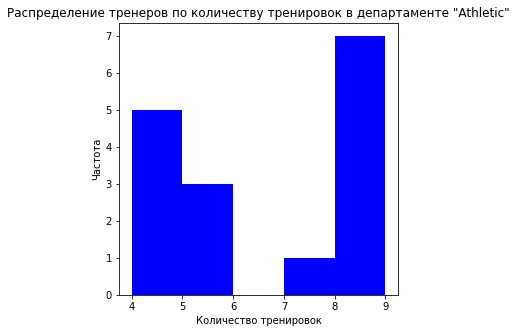

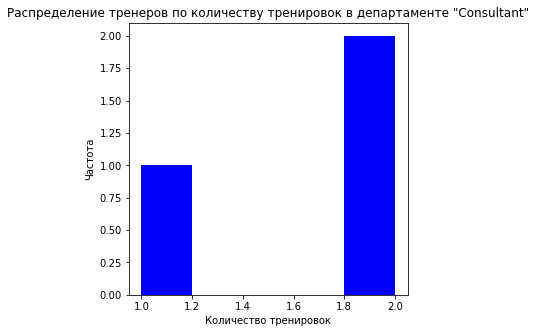

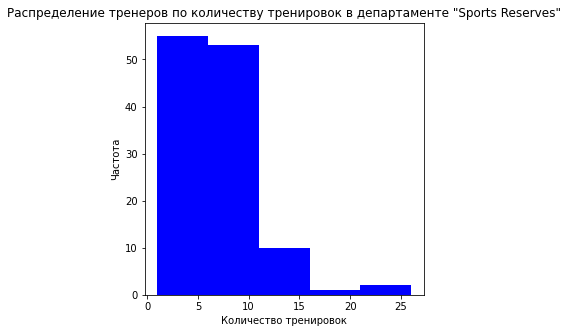

In [9]:
for department in departments:
    data = workouts_by_trainer.loc[workouts_by_trainer['trainer_department']==department]
    plt.subplots(figsize = (5,5))
    plt.hist (data ['workouts'], bins = 5, color = 'b')
    plt.title (f'Распределение тренеров по количеству тренировок в департаменте "{department}"')
    plt.xlabel('Количество тренировок')
    plt.ylabel('Частота')
    plt.show()

## Задание 3

Мы поняли, как тренировки распределились в каждом департаменте, но чтобы принимать какие-то решения, нужно посмотреть общую картину. Здесь нам поможет боксплот: увидим, в каких департаментах низкое среднее количество тренировок по сравнению с остальными и где больше перегруженных тренеров.

**Построй boxplot (один) с распределением тренеров по количеству проведенных уроков с разбивкой по департаментам.**

Как это сделать:

1. В функцию, которая строит boxplot, передай аргументы: департаменты, общее количество проведенных тренерами занятий и количество тренировок у каждого тренера
2. Используй цвет
3. Оставь комментарий: какие рекомендации можно дать по распределению нагрузки на тренеров разных департаментов, глядя на этот график?

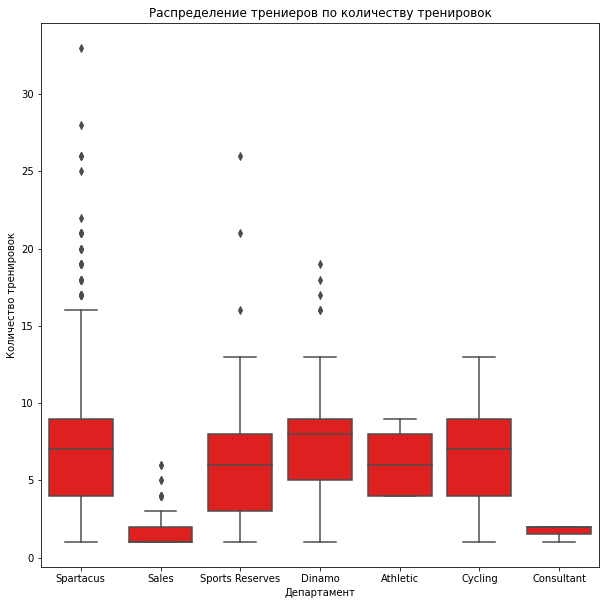

In [10]:
plt.figure(figsize = (10,10))
sns.boxplot(x=workouts_by_trainer['trainer_department'], y=workouts_by_trainer['workouts'], color='r')
plt.title('Распределение трениеров по количеству тренировок')
plt.xlabel('Департамент')
plt.ylabel('Количество тренировок')
plt.show()


## Задание 4


Логично, что дешевые тренировки пропускают чаще дорогих, но мы хотим сформировать стратегию по снижению количеству пропусков, а значит нам нужны более точные данные. Для начала мы хотим посмотреть детально на корреляцию нескольких параметров с вероятностью пропусков. Возможно, это позволит нам лучше сегментировать нашу аудиторию.

Есть гипотеза, что на вероятность прогула влияет не только цена, но и возраст. Изучи этот вопрос с помощью графиков. 

**Тебе предстоит построить 3 скаттерплота в этом задании. Оставь комментарий по каждому графику – видишь ли ты какие-то явные зависимости в данных?**

1. **Внимательно изучи код, который мы подготовили, и запусти ячейки.** Что мы сделали:
    - отфильтровали только платные тренировки
    - поменяли тип данных в числовых столбцах на `int`
    - разметили столбец со статусом, успешные тренировки пометили единицей, пропущенные - нулем, чтобы высчитать долю пропусков
    - создали датафрейм, где подсчитана доля прогулов по двум параметрам: возраст и цена


2. **Построй скаттерплот, который покажет корреляцию прогулов к цене**
    - используй группировку и создай датафрейм, где подсчитан процент прогулов аналогично предподготовленному датафрейму `cost_age_data_agg`, но без возраста, только с ценой
    - в функцию, которая строит скаттерплот можешь добавить любые аргументы, но обязательно используй вот эти:
        - размер графика
        - название графика
        - подпись оси `X`
        
        - подпись оси `Y`
        - задай цвет на графике
    
Подготовим данные:

In [11]:
# отфильтровали бесплатные тренировки и сделали копию датафрейма
cost_age_data = workouts_users[['status','cost','age']].loc[workouts_users.workout_schedule_type!='trial'].dropna().copy()

# Изменяем тип данных столбцов age и cost на int. Это нужно, чтобы на подписях к диаграммам числа были целыми
cost_age_data['age'] = cost_age_data['age'].apply(int) 
cost_age_data['cost'] = cost_age_data['cost'].apply(int)

# Кодируем столбец status, присваивая 1 в случаях, если он равен failed_by_client и 0 в случае success
cost_age_data['status'] = cost_age_data.status.map({'success':0,'failed_by_client':1})

# создаём агрегированные наборы данных
cost_age_data_agg = cost_age_data.groupby(['cost','age'])['status'].mean().reset_index() #считаем долю прогулов по возрасту и цене 

cost_age_data_agg

,cost,age,status
0,500,5,0.000000
1,500,6,0.500000
2,500,7,0.500000
3,500,8,0.242424
4,500,9,0.235294
...,...,...,...
185,1500,47,0.000000
186,1500,49,0.125000
187,1500,50,0.500000
188,1500,55,0.187500


In [12]:
percent_cost = workouts_users[['status','cost']].loc[workouts_users.workout_schedule_type!='trial'].dropna().copy()
percent_cost['cost'] = percent_cost['cost'].apply(int)
percent_cost['failed'] = percent_cost.status.map({'failed_by_client':1})
percent_cost['success'] = percent_cost.status.map({'success': 1})
percent_cost = percent_cost.groupby(['cost'])[['failed', 'success']].sum().reset_index()
percent_cost['percent'] = percent_cost['failed'] / (percent_cost ['success'] + percent_cost['failed']) * 100
percent_cost


,cost,failed,success,percent
0,500,1152.0,3051.0,27.408994
1,750,15663.0,53221.0,22.738227
2,1000,4255.0,19888.0,17.624156
3,1500,381.0,2401.0,13.695183


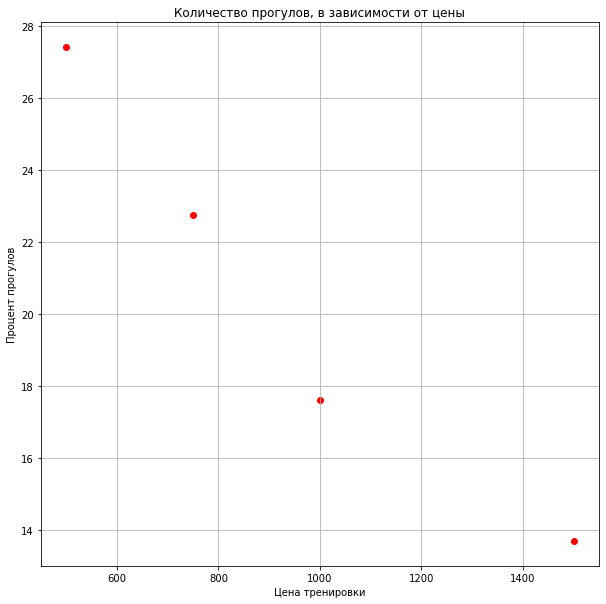

In [13]:
plt.figure(figsize=(10, 10))
plt.scatter (percent_cost['cost'], percent_cost['percent'], color = 'r')
plt.title('Количество прогулов, в зависимости от цены')
plt.xlabel('Цена тренировки')
plt.ylabel('Процент прогулов')
plt.grid()
plt.show()

3. **Построй скаттерплот, который покажет корреляцию прогулов к возрасту**
    - используй группировку и создай датафрейм, где подсчитан процент прогулов аналогично предподготовленному датафрейму `cost_age_data_agg`, но без цен, только с возрастом
    - в функцию, которая строит скаттерплот, можешь добавить любые аргументы, но обязательно используй вот эти:
        - размер графика
        - название графика
        - подпись оси `X`
        
        - подпись оси `Y`
        - задай цвет на графике

In [14]:
percent_age = workouts_users[['status','age']].loc[workouts_users.workout_schedule_type!='trial'].dropna().copy()
percent_age['age'] = percent_age['age'].apply(int)
percent_age['failed'] = percent_age.status.map({'failed_by_client':1})
percent_age['success'] = percent_age.status.map({'success': 1})
percent_age = percent_age.groupby(['age'])[['failed', 'success']].sum().reset_index()
percent_age['percent'] = percent_age['failed'] / (percent_age ['success'] + percent_age['failed']) * 100


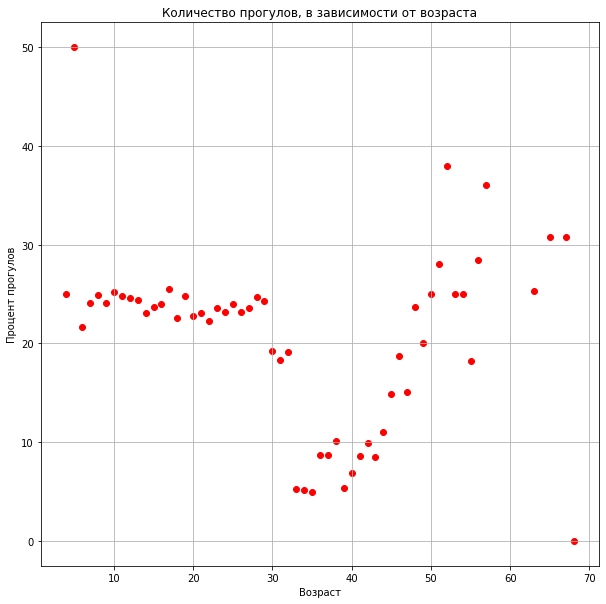

In [15]:
plt.figure(figsize=(10, 10))
plt.scatter (percent_age['age'], percent_age['percent'], color = 'r')
plt.title('Количество прогулов, в зависимости от возраста')
plt.xlabel('Возраст')
plt.ylabel('Процент прогулов')
plt.grid()
plt.show()

4. **Построй скаттерплот, который покажет корреляцию прогулов и к возрасту, и к цене одновременно**
    - создай словарь цветов и цен в переменной `price_color`. Чтобы увидеть все уникальные значения, можно использовать множества
    - в функцию, которая строит скаттерплот, можешь добавить любые аргументы, но обязательно используй вот эти:
        - размер графика
        - название графика
        - подпись оси `X`
        
        - подпись оси `Y`
        - аргумент  `с` - цвета для разных цен
          

In [16]:
price_color={500:'r',
            750:'g',
            1000:'b',
            1500:'m'}

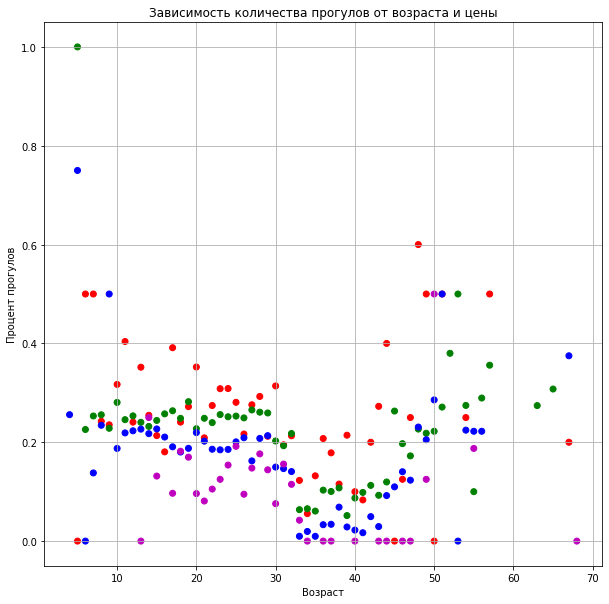

In [17]:
plt.figure(figsize=(10, 10))
plt.scatter (cost_age_data_agg['age'], 
             cost_age_data_agg['status'], 
             color = cost_age_data_agg['cost'].map(price_color))
plt.title('Зависимость количества прогулов от возраста и цены')
plt.xlabel('Возраст')
plt.ylabel('Процент прогулов')
plt.grid()
plt.show()

## Задание 5

**Сделай heatmаp для кейса из задания 4.** 

1. Внимательно изучи код, который мы подготовили, и запусти ячейки. Что мы сделали:
    - написали функцию, которая в зависимости от возраста возвращает возрастную группу
    - создали новый столбец, применив функцию к столбцу возраста
    - сгруппировали данные, чтобы для каждой пары возраст-цена была сгруппирована средняя вероятность прогула
    
    
2. Создай сводную таблицу (матрицу), в которой строками будут интервалы возраста, столбцами — цена занятия, значением — доля прогулов.
3. Построй heatmap. Используй любые аргументы, но обязательно добавь вот эти:
    - размер графика
    - название графика
    - подпись оси `X`
    
    - подпись оси `Y`
    - вывод значений в ячейках
    
4. Оставь комментарий: какие закономерности ты видишь на графике?

In [18]:
# пишем функцию, которая поможет разбить клиентов на возрастные группы

def calculate_age_bins(age):
    if age <= 20:
        return '0-20'
    if age <= 25:
        return '21-25'
    if age <= 30:
        return '26-30'
    if age <= 35:
        return '31-35'
    if age <= 40:
        return '36-40'
    if age <= 45:
        return '41-45'
    if age <= 50:
        return '46-50'
    return '50+'

In [19]:
# кладем в новый столбец возрастную группу
cost_age_data['age_bin'] = cost_age_data.age.apply(calculate_age_bins)

# создаём агрегированный набор данных
cost_age_data_agg = cost_age_data.groupby(['cost','age_bin'])['status'].mean().reset_index()
cost_age_data_agg

,cost,age_bin,status
0,500,0-20,0.286578
1,500,21-25,0.283505
2,500,26-30,0.255597
3,500,31-35,0.165217
4,500,36-40,0.175573
5,500,41-45,0.191489
6,500,46-50,0.285714
7,500,50+,0.307692
8,750,0-20,0.249445
9,750,21-25,0.250124


In [20]:
cost_age_data_agg_pivot = cost_age_data_agg.pivot(index = 'age_bin',
                       columns = 'cost',
                       values = 'status')
for column in [500, 750, 1000, 1500]:
    cost_age_data_agg_pivot[column] = round(cost_age_data_agg_pivot[column],2)
cost_age_data_agg_pivot

cost,500,750,1000,1500
age_bin,,,,
0-20,0.29,0.25,0.21,0.13
21-25,0.28,0.25,0.19,0.16
26-30,0.26,0.25,0.19,0.12
31-35,0.17,0.13,0.07,0.10
36-40,0.18,0.10,0.04,0.00
41-45,0.19,0.11,0.07,0.00
46-50,0.29,0.20,0.17,0.10
50+,0.31,0.30,0.24,0.18


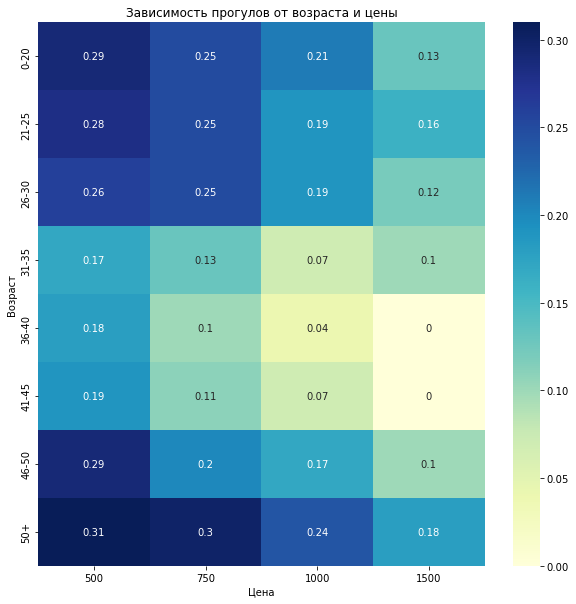

In [21]:
plt.figure(figsize = (10,10))
sns.heatmap(cost_age_data_agg_pivot,
           annot = True,
           cmap = 'YlGnBu',
           fmt = 'g')
plt.title('Зависимость прогулов от возраста и цены')
plt.xlabel('Цена')
plt.ylabel('Возраст')
plt.show()

## EXTRA

Если остались силы, сделай дополнительное задание по желанию. Основная его сложность в том, что нужно построить bar chart, а на занятии функцию этого графика мы не проходили. Но найти информацию самостоятельно будет совсем не сложно. 

**Чтобы углубиться в данные, построй bar chart количества тренировок по дням недели (с понедельника по воскресенье) и отобрази горизонтальной линией на графике среднее количество тренировок  в день.**

Как это сделать:
1. Внимательно изучи код, который мы подготовили, и запусти ячейки. Что мы сделалали:
    - вернули индекс внутри датафрейма
    - переименовали столбцы, чтобы они соответствовали содержимому
    - добавили столбец с номером дня недели с помощью `dt.weekday`
    
    - добавили столбец с названием дня недели с помощью `dt.day_name()`
    

2. Cгруппируй данные колонки `week_day_num` по `workouts` с подсчетом среднего.
3. Построй bar chart. Можешь добавить любые агрументы, но обязательно используй вот эти:

    - размер графика
    - название графика
    - подпись оси `X`
    
    - подпись оси `Y`
    - задай цвет на графике
    

4. Добавь горизонтальную линию, параллельную оси `X`, со значением `y` равным средним количеством тренировок в день. Если не помнишь, как это делать, смело смотри шпаргалку – там ты найдешь все детали.
5. Если еще осталось желание исследовать новое, можешь добавить на график название дней недели, задав их с помощью метода `plt.xticks`, его ты легко найдешь в документации. 
6. Оставь комментарий: что ты видишь на графике? 

**Подготовим данные**

In [22]:
trainings_by_day # посмотрим, в каком формате лежат нужные данные

start_at
2020-01-01      1
2020-01-02      4
2020-01-03      5
2020-01-04      5
2020-01-05      9
             ... 
2020-12-03    486
2020-12-04    365
2020-12-05    292
2020-12-06    250
2020-12-07    451
Freq: D, Name: workout_id, Length: 342, dtype: int64

In [23]:
trainings_by_day_frame = trainings_by_day.reset_index() # сбросим индекс
trainings_by_day_frame.columns=['workouts_date', 'workouts'] # переименуем столбцы, чтобы названия соответствовали содержимому
trainings_by_day_frame['week_day_num'] = trainings_by_day_frame['workouts_date'].dt.weekday # добавим номер дня недели
trainings_by_day_frame['week_day_name'] = trainings_by_day_frame['workouts_date'].dt.day_name() # добавим название дня недели
trainings_by_day_frame

,workouts_date,workouts,week_day_num,week_day_name
0,2020-01-01,1,2,Wednesday
1,2020-01-02,4,3,Thursday
2,2020-01-03,5,4,Friday
3,2020-01-04,5,5,Saturday
4,2020-01-05,9,6,Sunday
...,...,...,...,...
337,2020-12-03,486,3,Thursday
338,2020-12-04,365,4,Friday
339,2020-12-05,292,5,Saturday
340,2020-12-06,250,6,Sunday


Мы видим, что нумерация начинается с 0 до 6. Чтобы дни недели выглядели привычнее, добавим к номеру дня 1.

In [43]:
trainings_by_day_frame['week_day_num'] -=1
trainings_by_day_frame.head()

,workouts_date,workouts,week_day_num,week_day_name
0,2020-01-01,1,3,Wednesday
1,2020-01-02,4,4,Thursday
2,2020-01-03,5,5,Friday
3,2020-01-04,5,6,Saturday
4,2020-01-05,9,7,Sunday


In [44]:
trainings_by_weekday = trainings_by_day_frame.groupby('week_day_num')['workouts'].mean().reset_index()
trainings_by_weekday

,week_day_num,workouts
0,1,366.387755
1,2,356.895833
2,3,332.857143
3,4,365.244898
4,5,304.326531
5,6,227.959184
6,7,190.142857


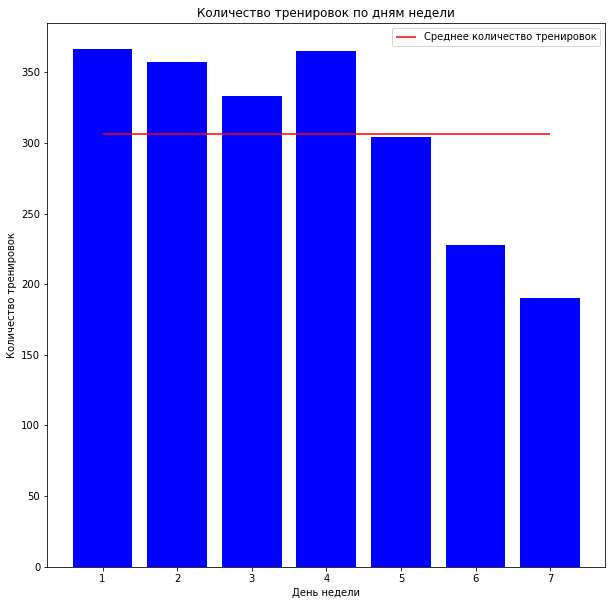

In [54]:
plt.figure(figsize = (10, 10))
plt.bar(trainings_by_weekday['week_day_num'],
        trainings_by_weekday['workouts'],
        color = 'b')
plt.hlines(trainings_by_weekday['workouts'].mean(),
          1, 7,
          label = 'Среднее количество тренировок',
          color = 'r')
plt.title('Количество тренировок по дням недели')
plt.xlabel('День недели')
plt.ylabel('Количество тренировок')
plt.legend()

plt.show()

# 🎉🎉🎉 Поздравляем, ты великолепен! 